# Import Libraries

In [29]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import random


## Load datasets

In [22]:
data = tf.keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels) = data.load_data()

## Display 9 images on random from dataset

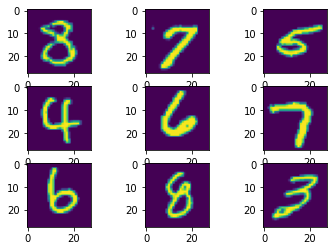

In [27]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    j = random.randint(1, 1000)
    plt.imshow(train_images[j])

## See the shape of dataset

In [24]:
print(train_images.shape)#60000 test images
print(test_images.shape) #10000 training images

(60000, 28, 28)
(10000, 28, 28)


## Normalise the images

In [25]:
train_images = train_images/255 
test_images = test_images/255

## Create neural network model

In [31]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Optimizer and loss functions

In [45]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer =Adam() , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [57]:
import livelossplot

history = model.fit(train_images, train_labels,
          epochs=20,
          validation_data=(test_images, test_labels),
          verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.1911 - val_accuracy: 0.9724
Epoch 2/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.1605 - val_accuracy: 0.9788
Epoch 3/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.2131 - val_accuracy: 0.9736
Epoch 4/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.1617 - val_accuracy: 0.9794
Epoch 5/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.1792 - val_accuracy: 0.9785
Epoch 6/20
60000/60000 [==============================] - 3s 50us/sample - loss: 8.8044e-04 - accuracy: 0.9997 - val_loss: 0.1725 - val_accuracy: 0.9799
Epoch 7/20
60000/60000 [============================

6
9
5
4
0
9
1
7
5


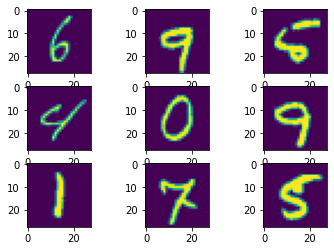

In [60]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    j = random.randint(1, 1000)
    plt.imshow(test_images[j])
    prediction = model.predict(test_images)
    print(np.argmax(prediction[j]))